## CIFAR-10 Dataset
CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. 

In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

labels = [‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’]

Import tensorflow and check it's version

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

Let's load CIFAR dataset

In [ ]:
from tensorflow.keras.datasets import cifar10

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

(50000, 32, 32, 3)

#### 1. Print shape of the data and understand howmany images of different class exist in this datset 

In [ ]:
print(X_train.shape)
#There are 50000 images are there in total in this train datset. Each image is 32x32x3 in size

(50000, 32, 32, 3)


In [ ]:
print(X_test.shape)
#There are 10000 images are there in total in this train datset. Each image is 32x32x3 in size

(10000, 32, 32, 3)


In [ ]:
np.unique(y_train) 
# 10 differnt classes. The labels are:
# [‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### 2. Visualize some images using matplotlib

[0]


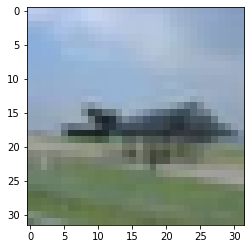

In [ ]:
plt.imshow(X_train[600,:,:,:])
print(y_train[600]) # Label 0 : Aeroplane

#### 3. Convert the RGB Image to Grayscale(For easier computation)
Hint: tf.image.rgb_to_grayscale(X_train) 

The above code will give the result as tensor, take only the numpy part from it and procced.


In [ ]:
x_train=tf.image.rgb_to_grayscale(X_train).numpy()
x_test=tf.image.rgb_to_grayscale(X_test).numpy()

In [ ]:
x_train.shape

(50000, 32, 32, 1)

#### 4. Normalize the data so that data is in range 0-1

In [ ]:
x_train=x_train/255.
x_test=x_test/255.

#### 5. Reshape train and test images into  one dimensional vector 


In [ ]:
xtrain=x_train.reshape(50000,32*32)
xtest=x_test.reshape(10000,32*32)

In [ ]:
xtrain.shape

(50000, 1024)

#### 6. Print shape of data and number of images

In [ ]:
print(xtrain.shape)
print('The number of images :',xtrain.shape[0])

(50000, 1024)
The number of images : 50000


#### 7. One-hot encode the class vector
Hint: from tensorflow.keras.utils import to_categorical


In [ ]:
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(y_train, num_classes=10)
ytest = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", ytrain.shape)
print("One value of y_train:", ytrain[0])

Shape of y_train: (50000, 10)
One value of y_train: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# DNN

#### 08. Construct the Deep Neural Network of following architecture

        input_neurons x 64 x 32 x 32 x output_neurons

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

img_classifier=Sequential() 

img_classifier.add(Dense(units=64,activation='relu',input_dim=1024))

img_classifier.add(Dense(units=32,activation='relu'))

img_classifier.add(Dense(units=32,activation='relu'))

img_classifier.add(Dense(units=10,activation='softmax'))


#### 09. Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 50
    - give validation data - testing features and labels

In [ ]:
img_classifier.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
img_classifier.fit(xtrain,ytrain,batch_size=32,epochs=50,validation_data=(xtest, ytest))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 60us/sample - loss: 2.1319 - accuracy: 0.2156 - val_loss: 2.0741 - val_accuracy: 0.2522
Epoch 2/50
50000/50000 [==============================] - 3s 50us/sample - loss: 2.0189 - accuracy: 0.2771 - val_loss: 2.0035 - val_accuracy: 0.2994
Epoch 3/50
50000/50000 [==============================] - 3s 51us/sample - loss: 1.9500 - accuracy: 0.3040 - val_loss: 1.9190 - val_accuracy: 0.3216
Epoch 4/50
50000/50000 [==============================] - 2s 48us/sample - loss: 1.8985 - accuracy: 0.3231 - val_loss: 1.8722 - val_accuracy: 0.3321
Epoch 5/50
50000/50000 [==============================] - 2s 49us/sample - loss: 1.8594 - accuracy: 0.3390 - val_loss: 1.8447 - val_accuracy: 0.3432
Epoch 6/50
50000/50000 [==============================] - 3s 51us/sample - loss: 1.8273 - accuracy: 0.3491 - val_loss: 1.8258 - val_accuracy: 0.3514
Epoch 7/50
50000/50000 [==============================] 

#### 10. Calculate Final loss and accuracy on test data

In [ ]:
img_classifier.evaluate(xtest, ytest)

10000/10000 [==============================] - 0s 26us/sample - loss: 1.6373 - accuracy: 0.4170


[1.6373111377716065, 0.417]